In [ ]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 경로 확인
!pwd

/content


In [ ]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


# OpenCV

## Hisogram 

```
이미지 데이터를 분석하기 위한 방법으로 사용한다 
```

In [ ]:
import cv2
import numpy as np

In [ ]:
im = cv2.imread('people.jpg')

In [ ]:
im

In [ ]:
cv2.calcHist([im],[0], None, [256], [0,256]) # 여러개 동시에 연산하기 때문에 2차로 결과를 낸다 

In [ ]:
cv2.calcHist([im,im],[0], None, [256], [0,256])

(0.0, 256.0)

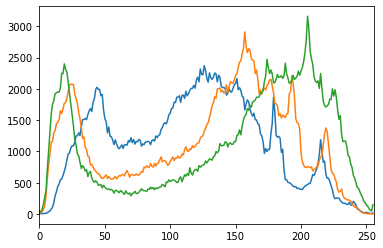

In [ ]:
# 색상 분포
plt.plot(cv2.calcHist([im],[0], None, [256], [0,256])) # B
plt.plot(cv2.calcHist([im],[1], None, [256], [0,256])) # G
plt.plot(cv2.calcHist([im],[2], None, [256], [0,256])) # R 
plt.xlim([0, 256])

### squeeze

```
길이가 1 인 축을 제거한다
```

In [ ]:
a = np.array([[1],[3]])
b = np.array([[[1,2],[3,4]]])

In [ ]:
a.shape, b.shape

((2, 1), (1, 2, 2))

In [ ]:
np.squeeze(a).shape, np.squeeze(b).shape

((2,), (2, 2))

In [ ]:
cv2.calcHist([im,im],[0], None, [256], [0,256]).shape

(256, 1)

In [ ]:
np.squeeze(cv2.calcHist([im,im],[0], None, [256], [0,256])).shape

(256,)

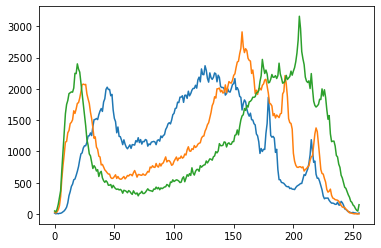

In [ ]:
plt.plot(cv2.calcHist([im,im],[0], None, [256], [0,256]))
plt.plot(cv2.calcHist([im,im],[1], None, [256], [0,256]))
plt.plot(cv2.calcHist([im,im],[2], None, [256], [0,256]))

### 속도 비교 

```
opencv는 속도 최적화가 되어 있다 
```

In [ ]:
%timeit im*im

1000 loops, best of 5: 202 µs per loop


In [ ]:
%timeit im**2

1000 loops, best of 5: 227 µs per loop


In [ ]:
cv2.useOptimized() # opencv연산에 최적화 되어 있다 

True

In [ ]:
%timeit cv2.medianBlur(im, 49) # 최적화 되어 있을 때 (최적화 되어 있을 때 일반적으로 20% 빠르다 / colab에서 medianBlur연산은 최적화 해도 그렇게 빠르지 않다)

10 loops, best of 5: 37.5 ms per loop


In [ ]:
cv2.setUseOptimized(False)
cv2.useOptimized()

False

In [ ]:
%timeit cv2.medianBlur(im, 49) # 최적화 되지 않을 때 

10 loops, best of 5: 37.8 ms per loop


In [ ]:
cv2.setUseOptimized(True)
cv2.useOptimized()

True

In [ ]:
%timeit im*im*im 

The slowest run took 20.40 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 292 µs per loop


In [ ]:
%timeit im**3 # 연산량이 많아지면서 im*im*im연산보다 im**3이 훨씬 느려졌다 

100 loops, best of 5: 3.24 ms per loop


### EqualizeHist

In [ ]:
im = cv2.imread('people.jpg', 0)
im2 = cv2.equalizeHist(im)

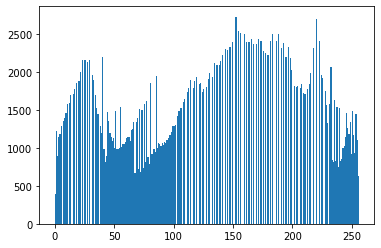

In [ ]:
plt.hist(im2.ravel(), 256,[0,256]); # 정규 분포 처럼 분포를 균일하게 만들어 준다 

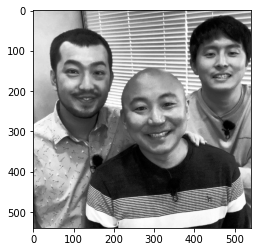

In [ ]:
plt.imshow(cv2.equalizeHist(im), cmap='gray') # 평탄화 => contrast가 낮아진다 => 분포가 균일해진다 => 밝고 어두운 정도가 구분하기 힘들어진다 

In [ ]:
from skimage.exposure import cumulative_distribution

In [ ]:
len(cumulative_distribution(im))

2

In [ ]:
y, x = cumulative_distribution(im)

(array([ 26.,  29.,  48.,  28.,  17.,  13.,  12.,  13.,  16.,  54.]),
 array([  2.74348422e-05,   1.00024691e-01,   2.00021948e-01,
          3.00019204e-01,   4.00016461e-01,   5.00013717e-01,
          6.00010974e-01,   7.00008230e-01,   8.00005487e-01,
          9.00002743e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

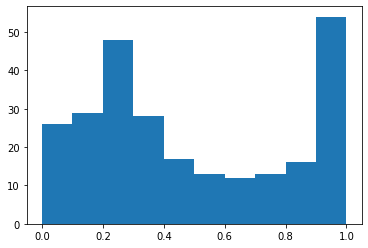

In [ ]:
plt.hist(y);

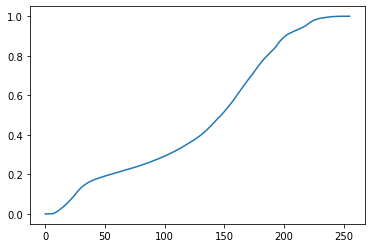

In [ ]:
plt.plot(x,y) # 누적 분포 

<hr>

## Numpy 

## Histogram

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
im = cv2.imread('people.jpg') # color 

In [ ]:
np.histogram(im, bins=10) # return이 두 개 (hist array, bin_edges(length(hist)+1) 

(array([ 78609,  83722,  55425,  62639,  96251, 126726, 146684, 112897,
         90637,  21210]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))

In [ ]:
im.dtype # 2^8 = 256 

dtype('uint8')

In [ ]:
np.histogram(im, bins=256, range=[0,256]) # 256등분 / 0이 92개 1이 51개... / color정보이기 때문에 수치가 많이 나온다 

(array([  92,   51,  119,  224,  406,  664, 1290, 1818, 2323, 2826, 3018,
        3290, 3549, 3736, 3856, 3928, 4209, 4413, 4537, 4848, 4852, 4987,
        5005, 4958, 4881, 4729, 4570, 4256, 4186, 3976, 3849, 3605, 3503,
        3489, 3487, 3281, 3249, 3110, 3217, 3150, 3008, 3073, 3052, 3206,
        3193, 3086, 3089, 2943, 2895, 2695, 2554, 2507, 2258, 2389, 2191,
        2185, 2115, 2019, 2163, 2048, 2012, 1996, 2055, 2095, 2010, 2032,
        2135, 2132, 2138, 2077, 2140, 2097, 2144, 2098, 2128, 2106, 2155,
        2202, 2166, 2168, 2230, 2255, 2285, 2306, 2289, 2345, 2337, 2360,
        2358, 2429, 2430, 2487, 2562, 2697, 2688, 2753, 2745, 2776, 2783,
        2924, 2969, 3095, 3149, 3179, 3199, 3258, 3302, 3349, 3284, 3369,
        3413, 3501, 3640, 3540, 3542, 3759, 3692, 3722, 3801, 3801, 3971,
        3999, 4021, 4278, 4239, 4254, 4480, 4509, 4408, 4414, 4677, 4674,
        4743, 4873, 5055, 5089, 5088, 5225, 5319, 5080, 5087, 5054, 5099,
        5108, 4934, 5152, 5206, 5158, 

In [ ]:
np.histogram(im.flatten(), 256, [0,256]) # flatten함수는 일차원으로 바꿔주는 함수 => 연산을 더 빠르게 하기 위해서 바꾼다 

(array([  92,   51,  119,  224,  406,  664, 1290, 1818, 2323, 2826, 3018,
        3290, 3549, 3736, 3856, 3928, 4209, 4413, 4537, 4848, 4852, 4987,
        5005, 4958, 4881, 4729, 4570, 4256, 4186, 3976, 3849, 3605, 3503,
        3489, 3487, 3281, 3249, 3110, 3217, 3150, 3008, 3073, 3052, 3206,
        3193, 3086, 3089, 2943, 2895, 2695, 2554, 2507, 2258, 2389, 2191,
        2185, 2115, 2019, 2163, 2048, 2012, 1996, 2055, 2095, 2010, 2032,
        2135, 2132, 2138, 2077, 2140, 2097, 2144, 2098, 2128, 2106, 2155,
        2202, 2166, 2168, 2230, 2255, 2285, 2306, 2289, 2345, 2337, 2360,
        2358, 2429, 2430, 2487, 2562, 2697, 2688, 2753, 2745, 2776, 2783,
        2924, 2969, 3095, 3149, 3179, 3199, 3258, 3302, 3349, 3284, 3369,
        3413, 3501, 3640, 3540, 3542, 3759, 3692, 3722, 3801, 3801, 3971,
        3999, 4021, 4278, 4239, 4254, 4480, 4509, 4408, 4414, 4677, 4674,
        4743, 4873, 5055, 5089, 5088, 5225, 5319, 5080, 5087, 5054, 5099,
        5108, 4934, 5152, 5206, 5158, 

```python
일차원으로 만드는 함수

1. ravel # view 방식 
2. flatten # copy 방식 
```

(0.0, 256.0)

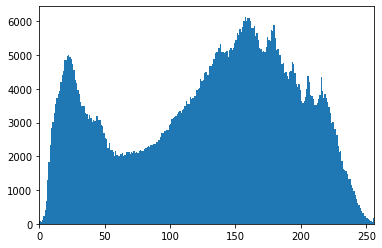

In [ ]:
plt.hist(im.ravel(), 256, [0, 256]); # 내부적으로 bincount를 사용해서 연산한다 
plt.xlim([0,256]) # x축 범위 설정 

In [ ]:
im2 = cv2.imread('people.jpg', 0) # 흑백 

(0.0, 256.0)

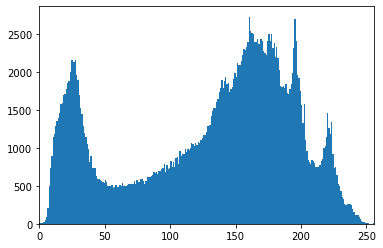

In [ ]:
plt.hist(im2.flatten(), 256, [0, 256]);
plt.xlim([0,256])

(0.0, 256.0)

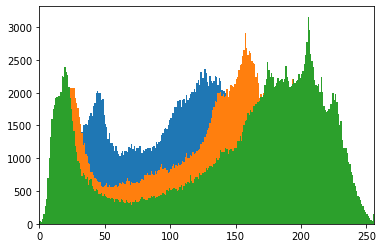

In [ ]:
# 각각 점의 컬러 분포 
plt.hist(im[...,0].ravel(), 256, [0, 256]); # B
plt.hist(im[...,1].ravel(), 256, [0, 256]); # G
plt.hist(im[...,2].ravel(), 256, [0, 256]); # R
plt.xlim([0,256])                           

In [ ]:
im2.shape # 흑백 

(540, 540)

In [ ]:
im2

array([[191, 193, 194, ..., 165, 166, 168],
       [190, 192, 193, ..., 173, 175, 176],
       [189, 191, 192, ..., 182, 183, 184],
       ..., 
       [106, 102, 109, ..., 113, 124, 129],
       [106, 102, 109, ..., 113, 120, 123],
       [101,  97, 104, ..., 119, 120, 120]], dtype=uint8)

(0.0, 256.0)

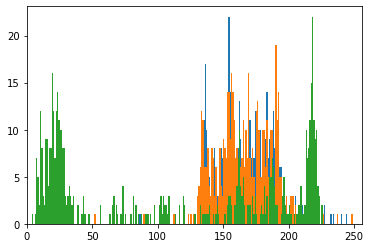

In [ ]:
plt.hist(im2[0].flatten(), 256, [0, 256]); 
plt.hist(im2[1].flatten(), 256, [0, 256]); 
plt.hist(im2[539].flatten(), 256, [0, 256]); 
plt.xlim([0,256])                            

In [ ]:
np.bincount(np.arange(5)) # 각각 몇개 있는지 세는 함수   

array([1, 1, 1, 1, 1])

In [ ]:
np.bincount(np.array([0,1,1,3,2,1,7]))

array([1, 3, 1, 1, 0, 0, 0, 1])

In [ ]:
from itertools import count, groupby

In [ ]:
t = groupby([1,1,1,2,2]) 
b = count()

In [ ]:
next(b)

3

In [ ]:
next(t) # 그룹으로 묶어서 몇개 있는지 확인 

(2, <itertools._grouper at 0x7fa251080ad0>)

### 얼굴부분 crop해서 색 분포 확인하기

In [ ]:
face = im[50:300,50:200]

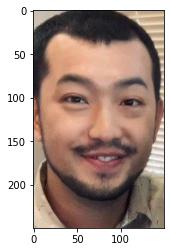

In [ ]:
plt.imshow(face[...,::-1])

(0.0, 256.0)

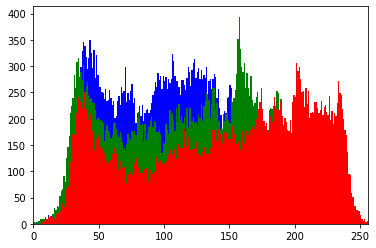

In [ ]:
plt.hist(face[...,0].ravel(), 256, [0, 256], color='blue'); 
plt.hist(face[...,1].ravel(), 256, [0, 256], color='green'); 
plt.hist(face[...,2].ravel(), 256, [0, 256], color='red'); 
plt.xlim([0,256])                           

In [ ]:
mask = np.zeros(im.shape[:2], np.uint8) # mask 
mask[50:300,50:200] = 255 # 흰색으로 

In [ ]:
cv2.bitwise_and(im,im,mask=mask) 

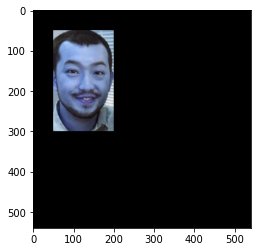

In [ ]:
plt.imshow(cv2.bitwise_and(im,im,mask=mask))

In [ ]:
plt.imshow(cv2.bitwise_and(im,mask)) # 차원이 달라서 연산이 안된다 

error: ignored

In [ ]:
im.shape, mask.shape

((540, 540, 3), (540, 540))

In [ ]:
im2 = cv2.imread('people.jpg', 0)

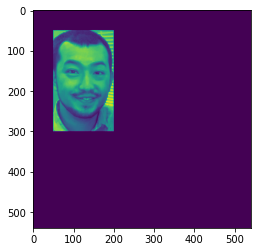

In [ ]:
plt.imshow(cv2.bitwise_and(im2,mask))

In [ ]:
cv2.calcHist([im], [0], mask, [256], [0,256]) # mask외 분포 구할 때 

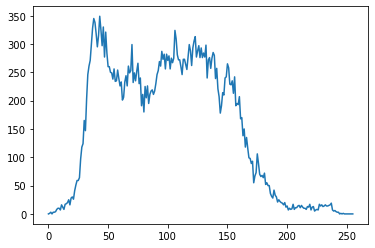

In [ ]:
plt.plot(cv2.calcHist([im], [0], mask, [256], [0,256]))

```
전통적인 머신러닝에서는 contrast가 높으면 이미지 분류가 잘 안되기 때문에 contrast 분포를 평평하게 만들었었다 (contrast normalization)
```

In [ ]:
from skimage.exposure import histogram, rescale_intensity, equalize_hist

In [ ]:
from skimage.util import img_as_float, img_as_ubyte 

In [ ]:
im = cv2.imread('people.jpg')

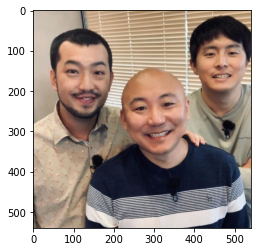

In [ ]:
plt.imshow(img_as_float(im)[...,::-1]) # 이미지는 float나 int 둘다 사람이 볼때는 상관 없다 / 하지만 컴퓨터는 float로 바꾸면 연속적이기 때문에 미분이 가능해진다 

In [ ]:
help(histogram)

Help on function histogram in module skimage.exposure.exposure:

histogram(image, nbins=256, source_range='image', normalize=False)
    Return histogram of image.
    
    Unlike `numpy.histogram`, this function returns the centers of bins and
    does not rebin integer arrays. For integer arrays, each integer value has
    its own bin, which improves speed and intensity-resolution.
    
    The histogram is computed on the flattened image: for color images, the
    function should be used separately on each channel to obtain a histogram
    for each color channel.
    
    Parameters
    ----------
    image : array
        Input image.
    nbins : int, optional
        Number of bins used to calculate histogram. This value is ignored for
        integer arrays.
    source_range : string, optional
        'image' (default) determines the range from the input image.
        'dtype' determines the range from the expected range of the images
        of that data type.
    normalize : boo

In [ ]:
np.info(histogram)

In [ ]:
np.lookfor('hist', 'skimage')

Search results for 'hist'
-------------------------
skimage.feature.hog
    Extract Histogram of Oriented Gradients (HOG) for a given image.
skimage.exposure.histogram
    Return histogram of image.
skimage.exposure.equalize_hist
    Return image after histogram equalization.
skimage.data.immunohistochemistry
    Immunohistochemical (IHC) staining with hematoxylin counterstaining.
skimage.exposure.match_histograms
    Adjust an image so that its cumulative histogram matches that of another.
skimage.feature.greycomatrix
    Calculate the grey-level co-occurrence matrix.
skimage.transform.match_histograms
    Adjust an image so that its cumulative histogram matches that of another.
skimage.exposure.equalize_adapthist
    Contrast Limited Adaptive Histogram Equalization (CLAHE).
skimage.filters.rank.modal
    Return local mode of an image.
skimage.exposure._adapthist._clahe
    Contrast Limited Adaptive Histogram Equalization.
skimage.filters.threshold_isodata
    Return threshold value(s

In [ ]:
import scipy

In [ ]:
np.lookfor('hist', 'scipy')

Search results for 'hist'
-------------------------
scipy.ndimage.histogram
    Calculate the histogram of the values of an array, optionally at labels.
scipy.stats.rv_histogram
    Generates a distribution given by a histogram.
scipy.stats.cumfreq
    Return a cumulative frequency histogram, using the histogram function.
scipy.stats.relfreq
    Return a relative frequency histogram, using the histogram function.
scipy.stats.binned_statistic
    Compute a binned statistic for one or more sets of data.
scipy.stats.binned_statistic_2d
    Compute a bidimensional binned statistic for one or more sets of data.
scipy.stats.binned_statistic_dd
    Compute a multidimensional binned statistic for a set of data.
scipy.stats.rv_histogram._cdf
    CDF calculated from the histogram
scipy.stats.rv_histogram._pdf
    PDF of the histogram
scipy.stats.rv_histogram._ppf
    Percentile function calculated from the histogram
scipy.stats.rv_histogram.__init__
    Create a new distribution using the given 

In [ ]:
equalize_hist(im.flatten())

array([ 0.73654893,  0.80552241,  0.86368427, ...,  0.47972908,
        0.42027549,  0.32775834])

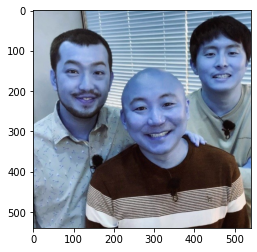

In [ ]:
plt.imshow(rescale_intensity(im, (0, 255))) # 범위를 조절 해준다 

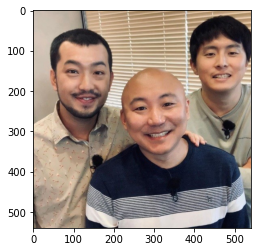

In [ ]:
plt.imshow(rescale_intensity(im[...,::-1], (0, 255)))

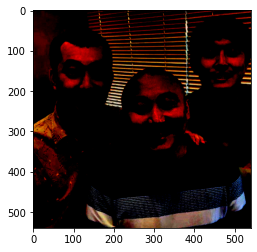

In [ ]:
plt.imshow(rescale_intensity(im[...,::-1], (200, 250))) # 200에서 250사이로 범위를 조절 했기 때문에 어둡게 변한다 

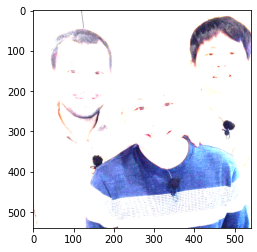

In [ ]:
plt.imshow(rescale_intensity(im[...,::-1], (0, 50))) # 0에서 50사이로 범위를 조절 했기 때문에 밝게 변한다 

In [ ]:
plt.imshow(rescale_intensity(im[...,::-1], (, 200))) 

## advanced

In [ ]:
x = [1,2,3,4,5,6]
y = np.array(x)

In [ ]:
y.cumsum() # 누적합을 빠르게 구하는 방법 

array([ 1,  3,  6, 10, 15, 21])

In [ ]:
np.add.accumulate(y)

array([ 1,  3,  6, 10, 15, 21])

In [ ]:
np.add.reduce(y)

21

In [ ]:
import tensorflow as tf 

In [ ]:
tf.reduce_sum(y)

<tf.Tensor: shape=(), dtype=int64, numpy=21>

In [ ]:
import seaborn as sns 

In [ ]:
iris = sns.load_dataset('iris')

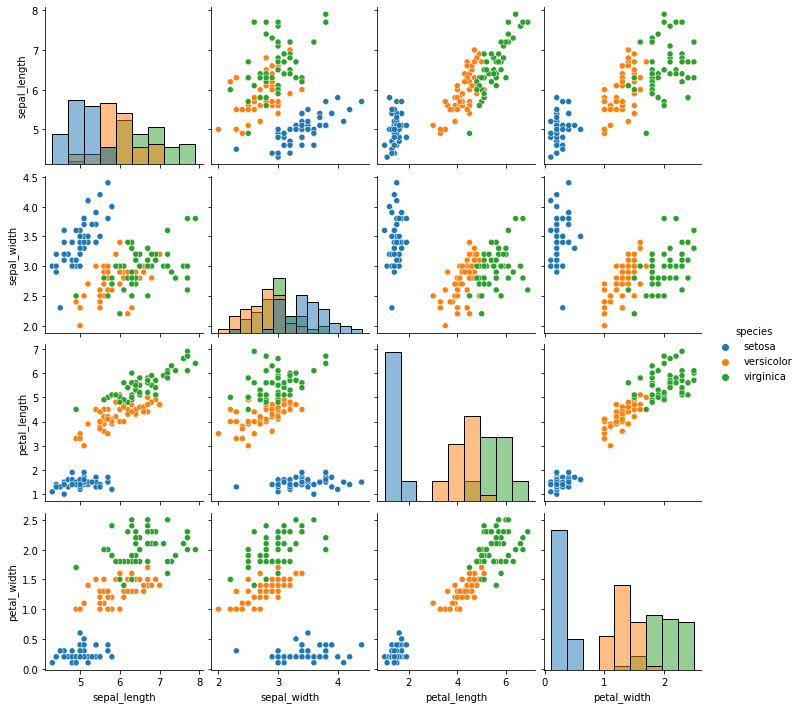

In [ ]:
sns.pairplot(iris, hue='species', diag_kind='hist') # 데이터에 분포에 따라서 옳바른 데이터인지 아닌지 확인할 수 있기 때문에 그래프를 확인한다 

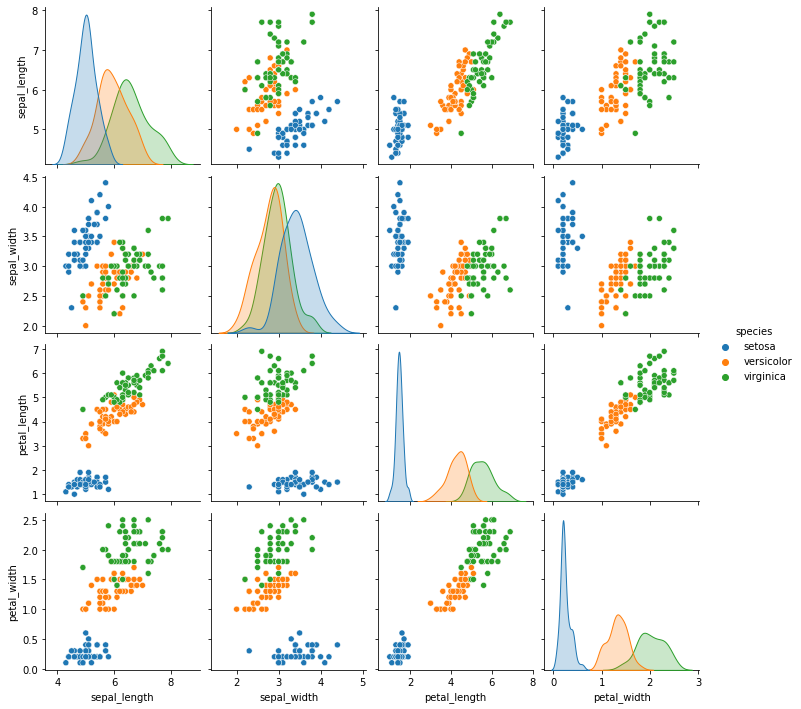

In [ ]:
sns.pairplot(iris, hue='species', diag_kind='kde')

## 누적 분포

In [ ]:
hist, bins = np.histogram(im.ravel(), 256, [0,256])
cdf = hist.cumsum()

In [ ]:
cdf_norm = cdf*float(hist.max()) / cdf.max() # 정규화, 0과 1사이의 값으로 만든다 

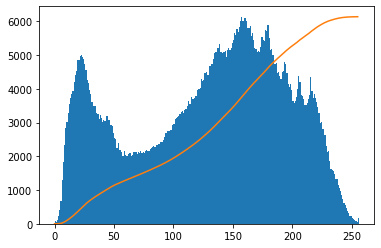

In [ ]:
plt.hist(im.ravel(), 256, [0,256])
plt.plot(cdf_norm)